In [1]:
# Problem Statement:

# Despite the continuous efforts of banks to attract and retain customers, the banking industry faces a persistent challenge in the form of customer churn, leading to financial losses and reduced customer satisfaction.
# It is advantageous for banks to know what leads a client towards the decision to leave the company.

# Project Objective:-

# The aim of this project is to analyze the customer churn rate for bank because it is useful to understand why the customers leave.
# After Analyzing we need to train a Machine Learning Model which can find the key factors that significantly influence the customer churn or attrition.
# In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.

# Project Overview:

# Churn refers to customers leaving a bank or discontinuing their banking services.
# Banking Churn Analysis is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.
# Banking Churn Modeling aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.

# Importing Required Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix

# Loading Dataset

In [3]:
df = pd.read_csv("Dataset.csv")


In [4]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Basic Understanding of Data


In [5]:
# RowNumber: It is likely a unique identifier for each record and does not contribute directly to the analysis.

# CustomerId: It can be used to track and differentiate individual customers within the dataset.

# Surname: It provides information about the family name of each customer.

# CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.

# Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.

# Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.

# Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.

# Tenure: It typically represents the number of years or months the customer has been associated with the bank.

# Balance: It reflects the amount of money in the customer's bank account at a specific point in time.

# NumOfProducts: It can include various offerings such as savings accounts, loans, debit cards, etc.

# HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.

# IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.

# EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.

# Exited: It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

# Generating Basic Information of the data.


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

# None of the columns is having missing values 

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Performing Descriptive Statistical Analysis on Categorical Columns.


In [10]:
df.sample(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8715,8716,15750837,Landseer,579,Germany,Male,41,0,141749.68,1,0,1,9201.53,0
5331,5332,15700627,Y?,637,Germany,Female,46,2,143500.82,1,1,0,166996.46,1
3564,3565,15803121,Chia,847,France,Male,51,5,97565.74,1,0,0,144184.06,1
2249,2250,15727546,Olejuru,762,France,Male,35,9,0.00,2,1,1,43075.70,0
1638,1639,15571550,Dore,699,France,Male,39,9,0.00,1,1,0,80963.92,0


In [11]:
unique_row_numbers1 = df['RowNumber'].nunique()
unique_row_numbers1

10000

In [12]:
unique_row_numbers2 = df['CustomerId'].nunique()
unique_row_numbers2

10000

In [13]:
unique_row_numbers3 = df['Surname'].nunique()
unique_row_numbers3

2932

In [14]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

# RowNumber and CustomerId columns represents a unique value for each customer and does not useful for predicting customer churned or not.
# So we can simply drop these features.

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.shape

(10000, 11)

In [17]:
df.describe()

# Stats of the data 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
df.rename(columns={"Exited":"Churned"},inplace=True)

#  Rename Target Variable 

In [19]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)


In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


# Exploratory Data Analysis


# 1. Visualizing Target Variable.


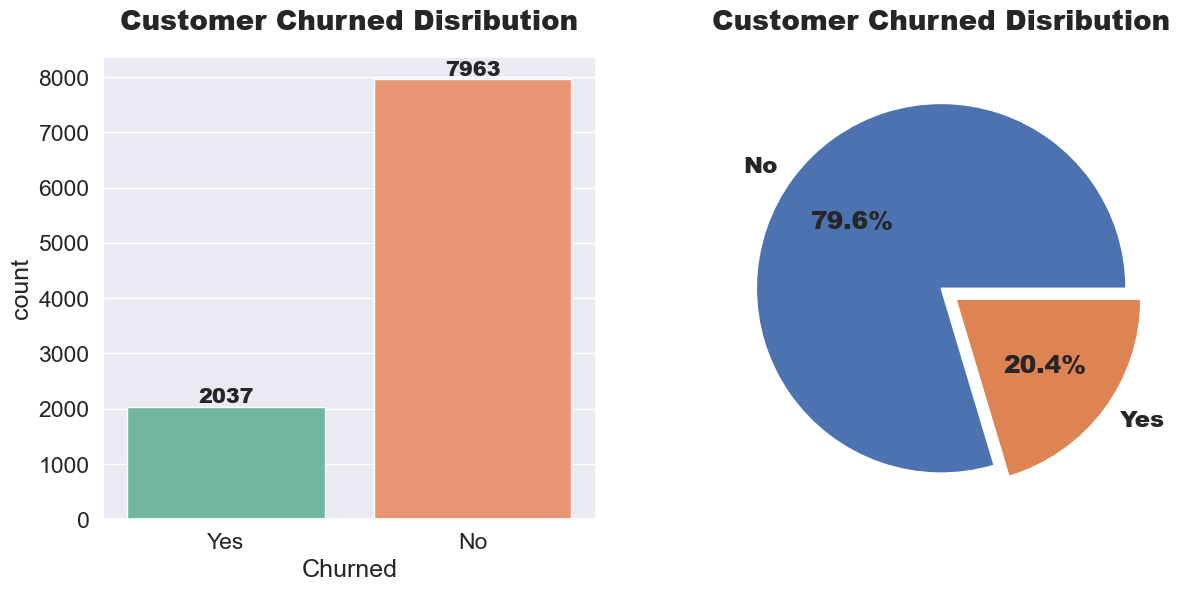

In [21]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

# The output column is imbalancig (20:80) , so we use algo. like Decision Tree 

# 2. Visualizing Customer Churned by Gender.


In [22]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()
    


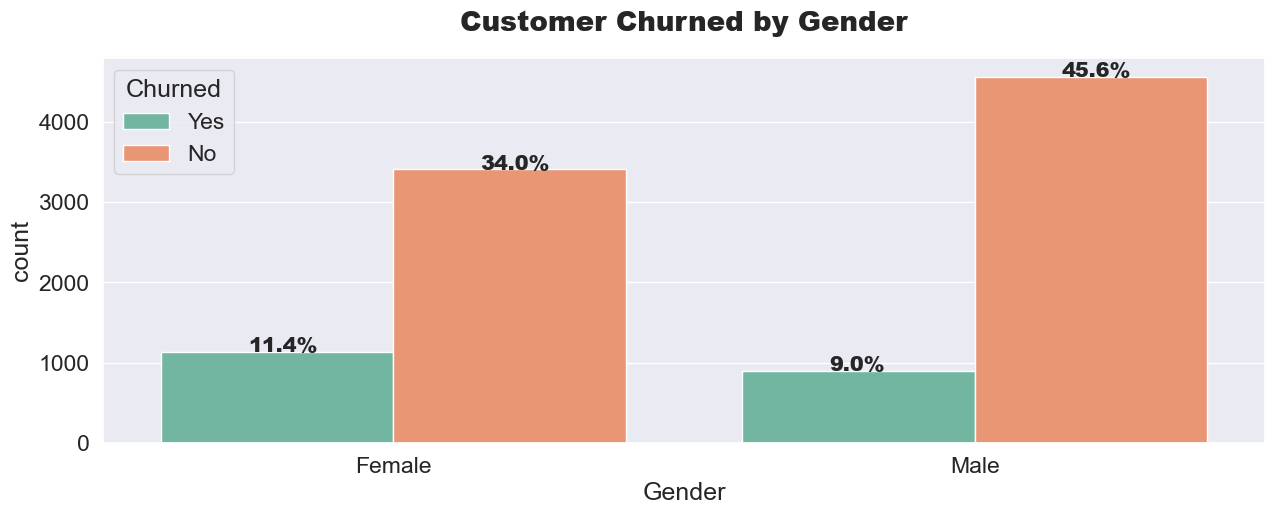

In [23]:
countplot("Gender")

# Which means female customers are more deactivating their banking facilities compared to male customers.
# To avoid this, bank can Focus on the overall customer experience for female customers.

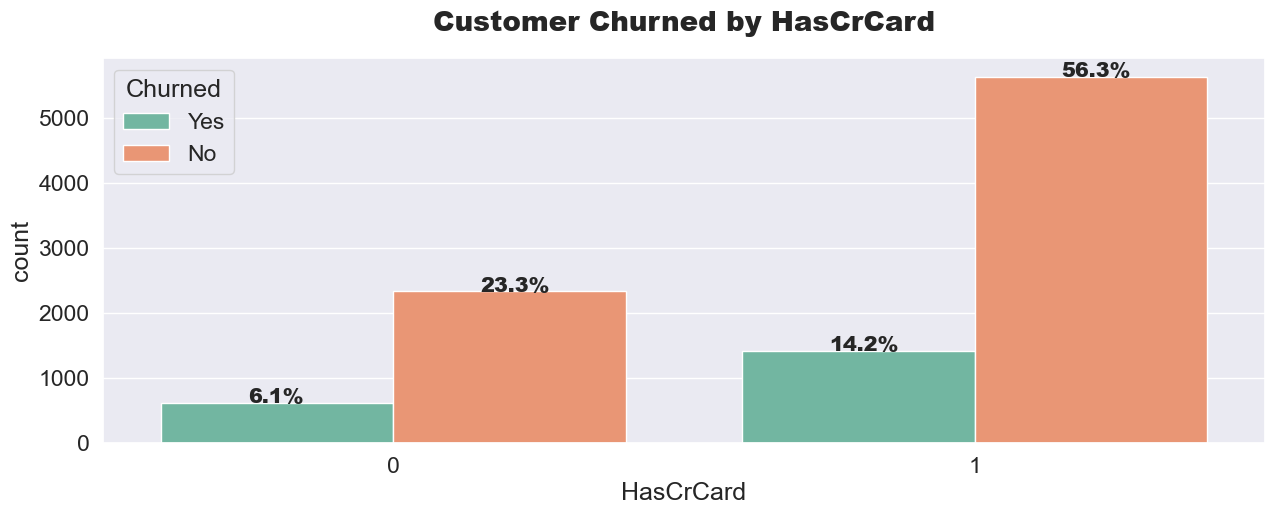

In [24]:
countplot("HasCrCard")

# The churn probability value for the both the categories is almost 1:4 , so credit card is not affecting the churn 

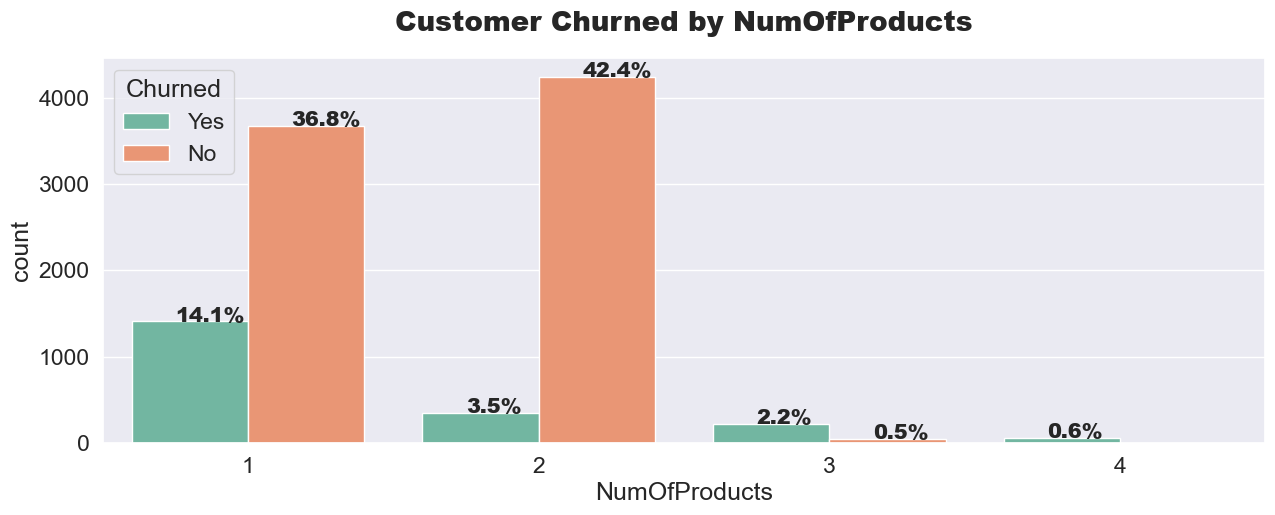

In [25]:
countplot("NumOfProducts")

# Most of the customers are having either 1 or 2 total number of banking products very few customers are having more than 2 total number of banking products.
# The lowest churn rate is with customers having only 2 products  and there is very high churn rate in customers having 1 product or more than 2 products.
# We  do feature engineering by grouping the customers having products more than 2 together to reduce the class imbalance.

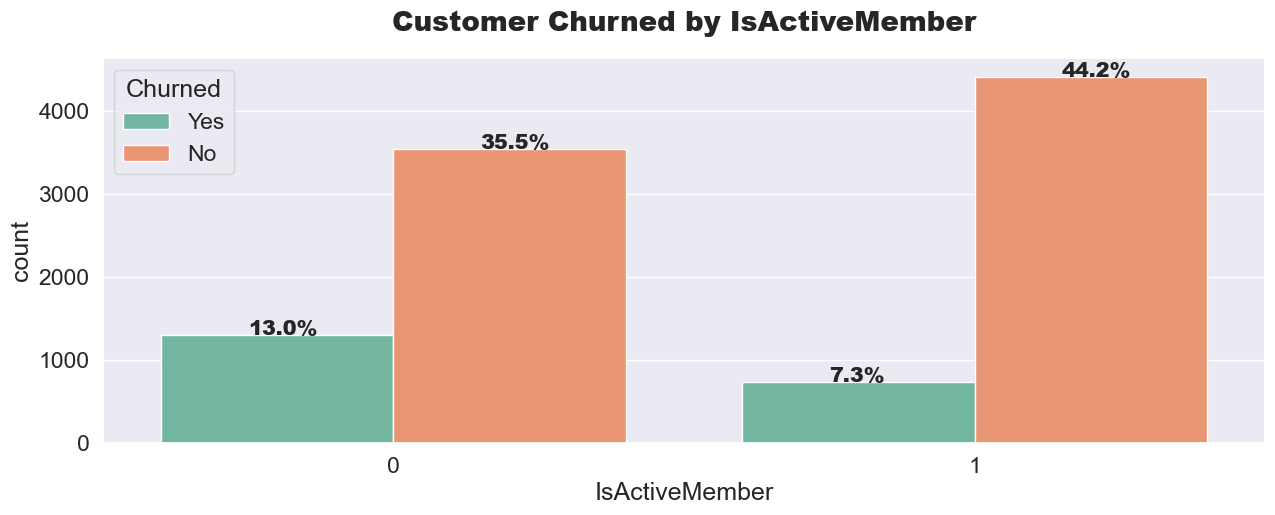

In [26]:
countplot("IsActiveMember")

#  The churn rate % of non  active customers is  double compared  active customers.

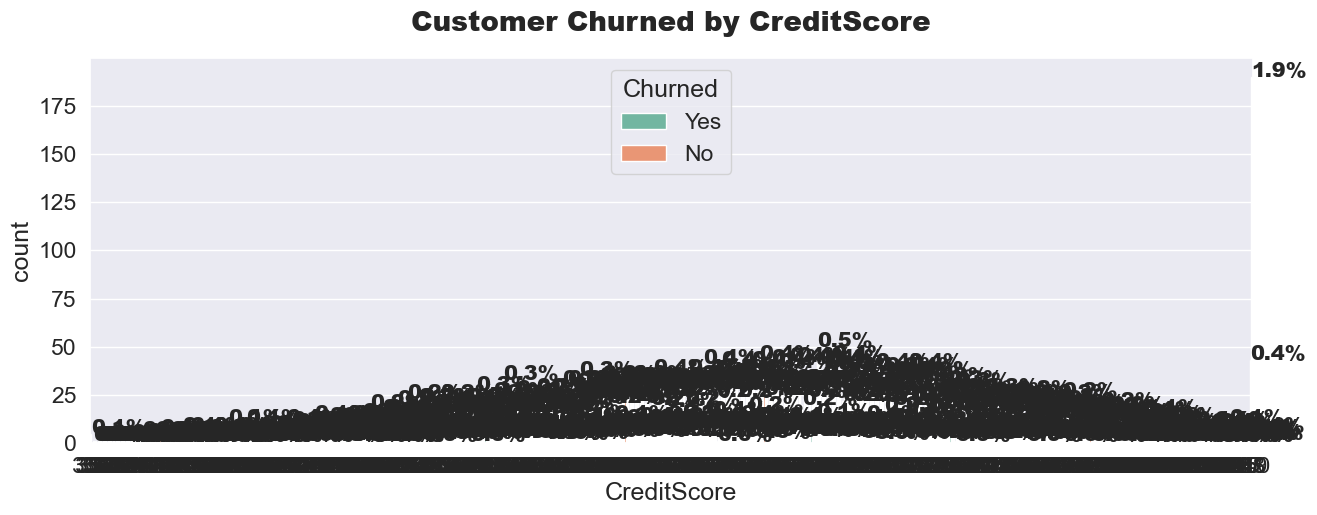

In [27]:
countplot("CreditScore")


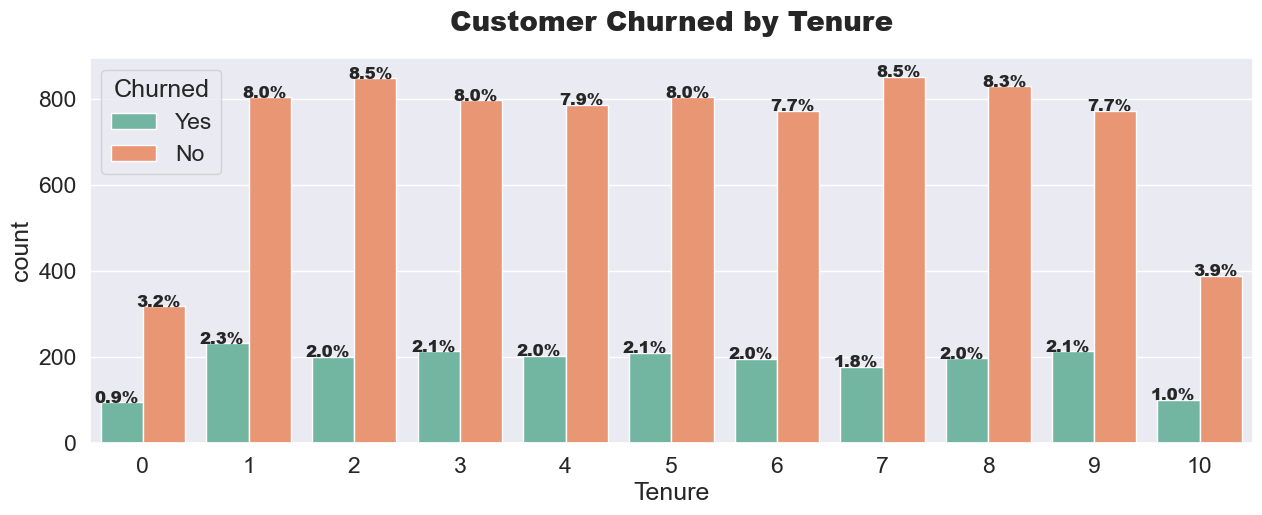

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

In [29]:
# The highest tenure is 10 years which means that those customers have opened their account 10 years back.
# Since there is almost similar distribution of churn status we can't make any specific inference.

In [30]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(df["Churned"],df[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()
    
    
    
# This provides the continous_plot w.r.t common categorical column Churned and give two subplots for each category of Churned
# The left subplot shows a histogram  which shows the distribution of the continuous column separately  
# The right subplot is a boxplot that shows the distribution of the same continuous column for spread and median and outliers

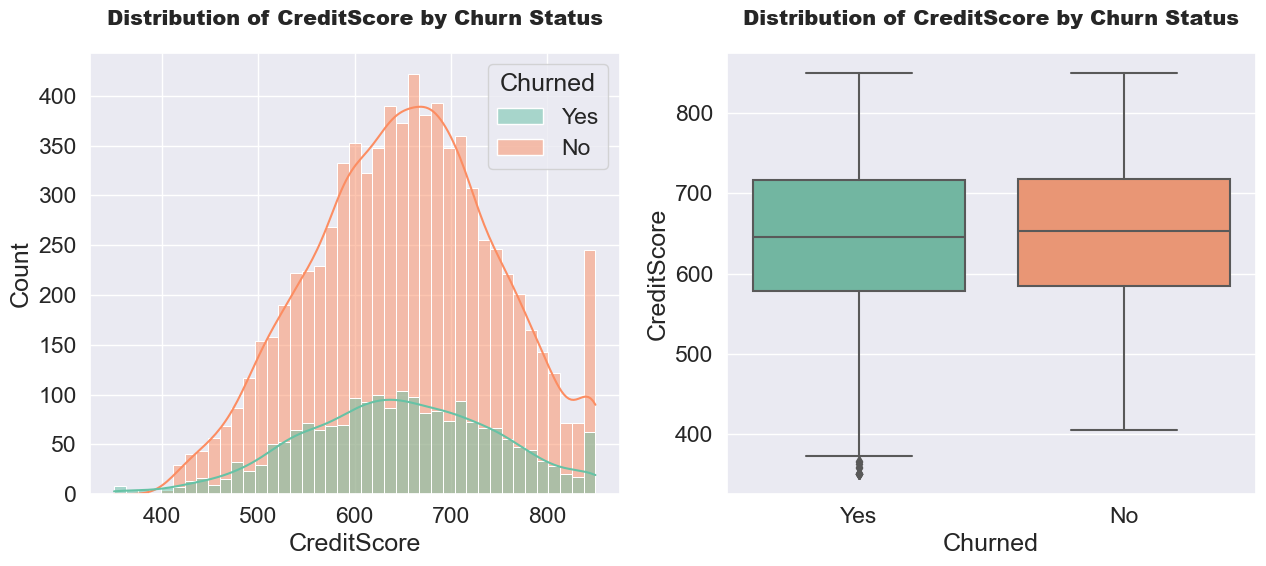

In [31]:
continous_plot("CreditScore")

# Has almost same distribution and has same median score , no info

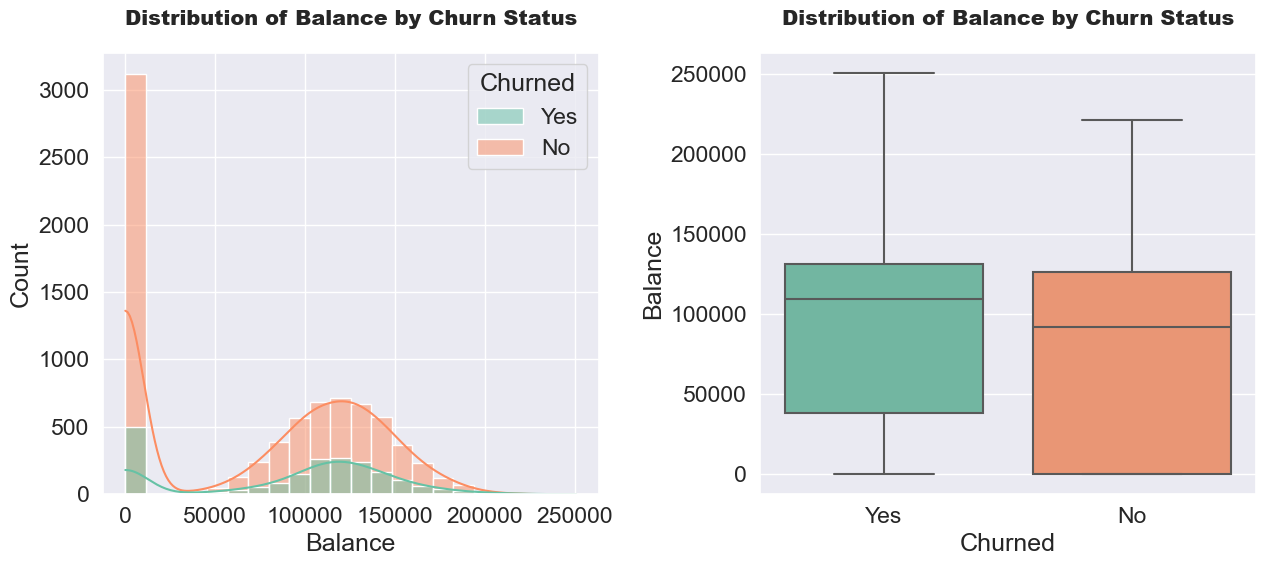

In [32]:
continous_plot("Balance")

# More than 3000 customers are having their account balance equal to zero.
# Other than zero value we can observe a normal distribution

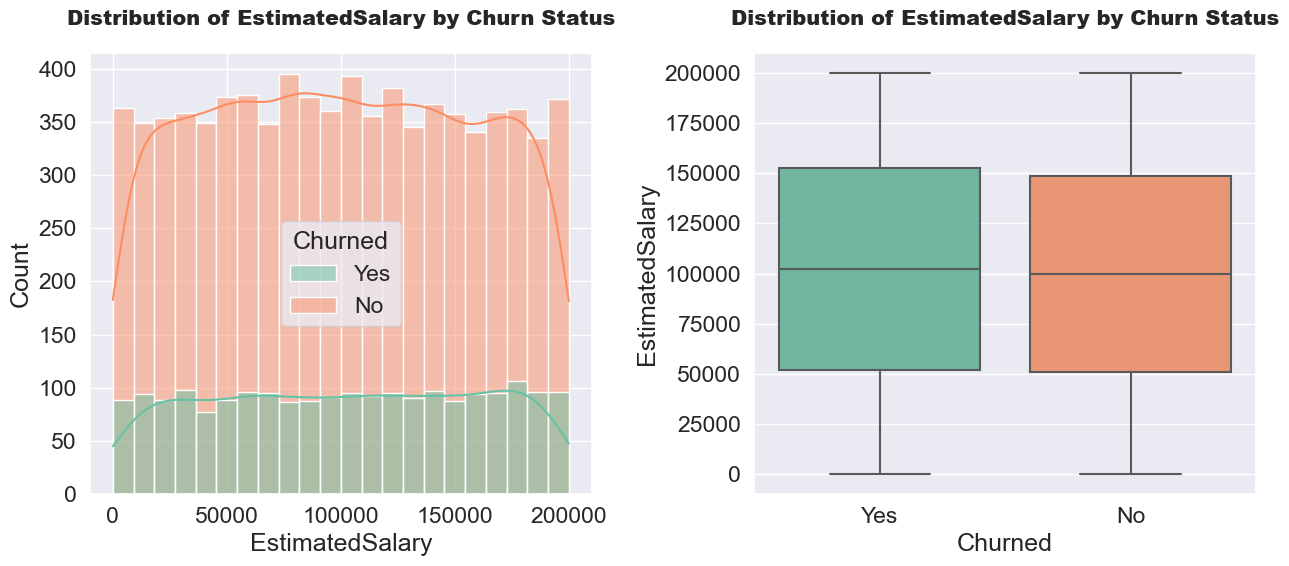

In [33]:
continous_plot("EstimatedSalary")

# Also has almost same distribution and has same median score , no information

# Feature Engineering


In [34]:
# Creating new column from "NumOfProducts" column

conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]
df["Total_Products"] = np.select(conditions,values) # rename the NumOfProducts to Total_Products
df.drop(columns="NumOfProducts", inplace=True)


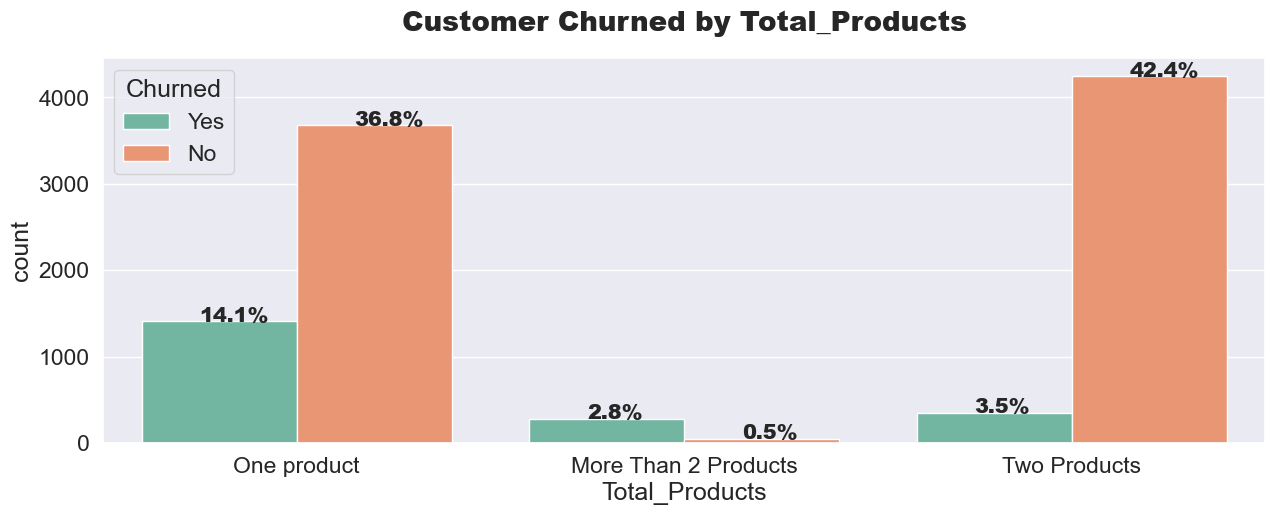

In [35]:
countplot("Total_Products")

# Shows the new feature Total_Products

In [36]:
#  Creating New Feature From "Balance" Feature.

conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]
df["Account_Balance"] = np.select(conditions, values)
df.drop(columns="Balance",inplace=True)


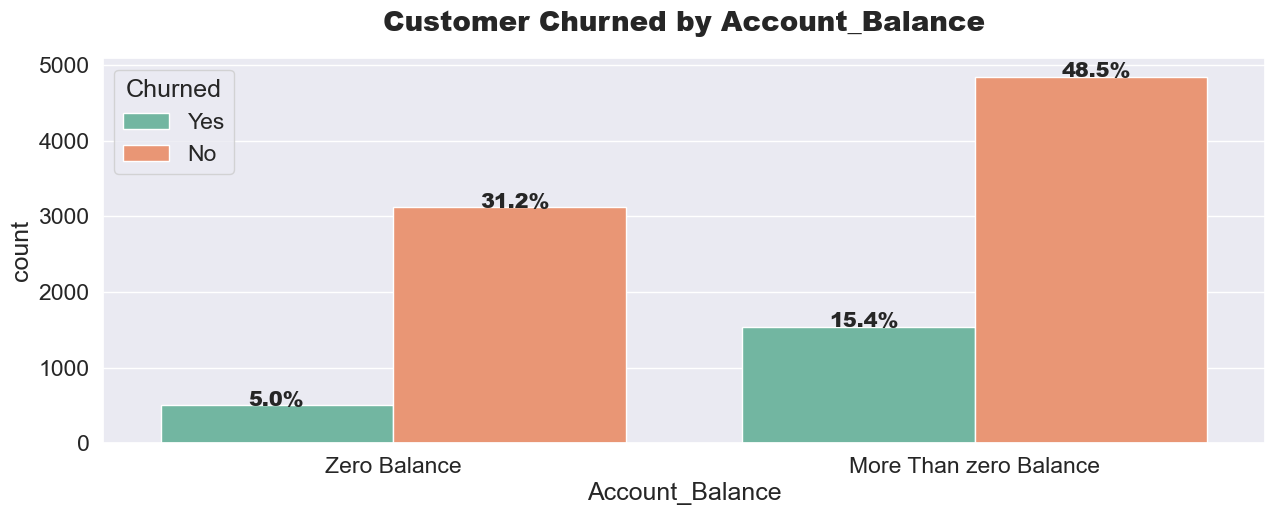

In [37]:
countplot("Account_Balance")

# Shows the new column "Account_Balance"

# Data Preprocessing


In [38]:
df

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.88,Yes,One product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.58,No,One product,More Than zero Balance
2,502,France,Female,42,8,1,0,113931.57,Yes,More Than 2 Products,More Than zero Balance
3,699,France,Female,39,1,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.10,No,One product,More Than zero Balance
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,1,0,96270.64,No,Two Products,Zero Balance
9996,516,France,Male,35,10,1,1,101699.77,No,One product,More Than zero Balance
9997,709,France,Female,36,7,0,1,42085.58,Yes,One product,Zero Balance
9998,772,Germany,Male,42,3,1,0,92888.52,Yes,Two Products,More Than zero Balance


In [39]:
#  Performing One Hot Encoding on Categorical Features.

cat_cols = ["Geography", "Gender", "Total_Products", "Account_Balance"]

df = pd.get_dummies(columns=cat_cols, data=df)


In [40]:
#  Encoding Target Variable.

df["Churned"].replace({"No":0,"Yes":1},inplace=True)


In [41]:
df.head()


,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [42]:
#  Checking Skewness of Continous Features.

cols = ["CreditScore","Age","EstimatedSalary"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

# Age Feature is highly right-skewed , which means there is possibility  of positive outliers , so we log normal 
# distribution which is used for scaling

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


In [43]:
#  Performing Log Transformation on Age Column.

old_age = df["Age"]
df["Age"] = np.log(df["Age"])


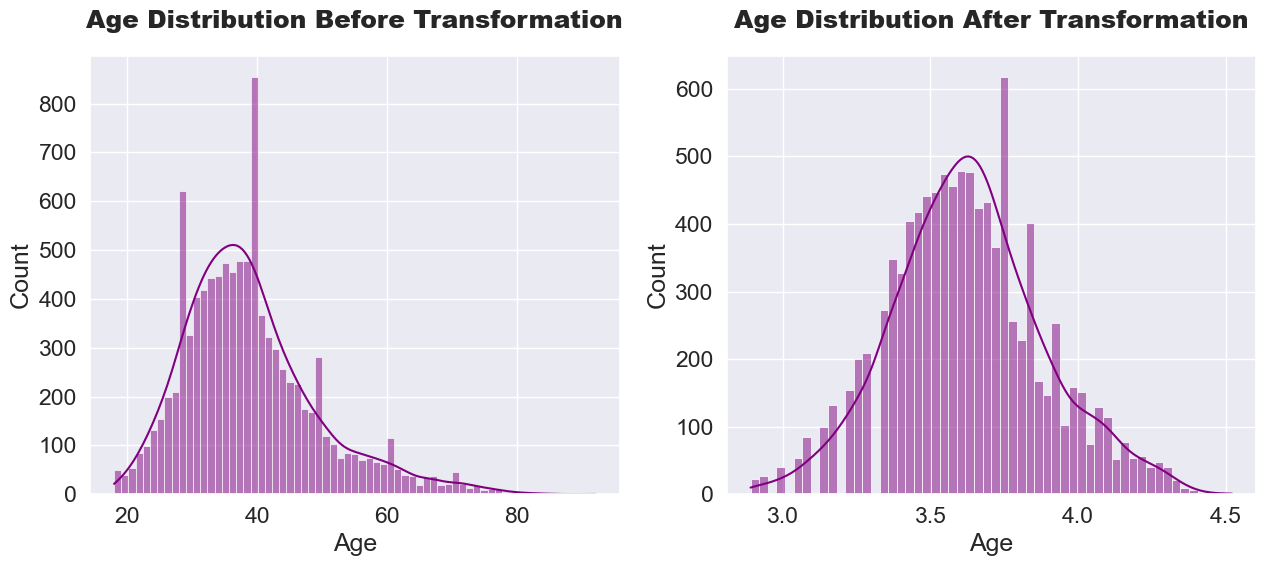

In [44]:
# Shows Age Before and After Transformation.

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()


# After applying log normal transformation the age feature has  a normal distribution.


# For split in trainig and testing data

In [45]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [47]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [48]:
x_train

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
7389,667,3.526361,5,1,0,163830.64,0,0,1,1,0,0,0,1,0,1
9275,427,3.737670,1,1,1,57098.00,0,1,0,0,1,0,1,0,1,0
2995,535,3.367296,2,1,0,185630.76,1,0,0,1,0,0,1,0,1,0
5316,654,3.688879,5,1,0,173617.09,0,0,1,0,1,0,1,0,1,0
356,850,4.043051,8,1,1,132298.49,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,594,3.465736,4,1,1,162961.79,0,1,0,1,0,0,0,1,1,0
4859,794,3.091042,4,1,1,107753.07,0,0,1,1,0,0,1,0,1,0
3264,738,3.555348,5,1,0,181429.87,1,0,0,0,1,0,0,1,1,0
9845,590,3.637586,9,1,1,148750.16,0,0,1,1,0,0,0,1,0,1


In [49]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Churned, Length: 2000, dtype: int64

# Model Creation using DecisionTree

# 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.


In [50]:
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "min_samples_split": [3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [3, 4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(dtree, param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]})

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

best_decision_tree_model = grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100 
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print('------------------------------------------')
print(f"Accuracy with Best Model: {accuracy_percentage:.2f}%") 




Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}
------------------------------------------
Accuracy with Best Model: 85.75%


In [52]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

imp_df = pd.DataFrame({"Feature Name": x_train.columns, "Importance": dtree.feature_importances_})


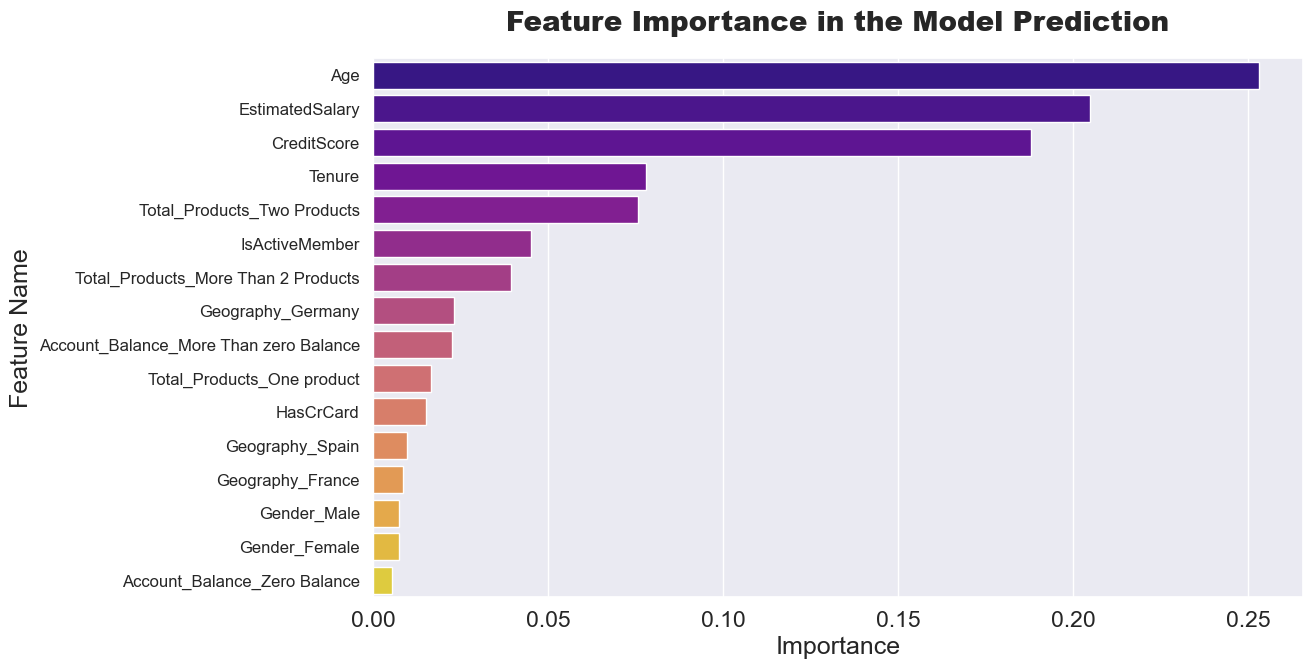

In [53]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

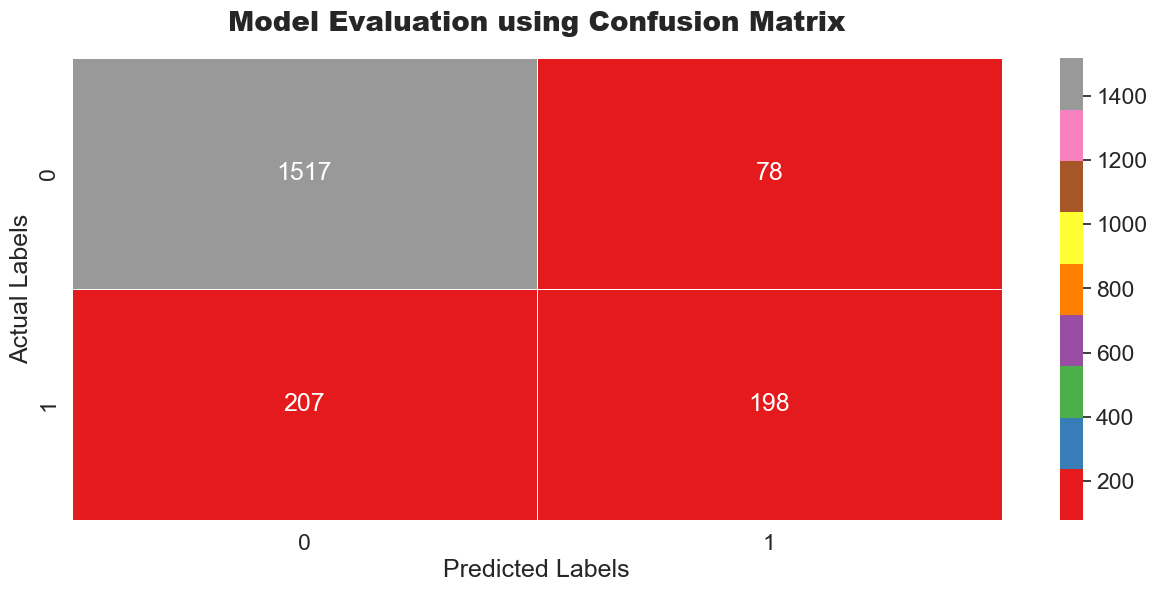

In [54]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


# Strong True Positive Rate

 # Model Creation using 
 # Random Forest





In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_classifier = RandomForestClassifier()

param_grid = {
    "n_estimators": [10, 20],
    "max_depth": [3, 4, 5],
    "min_samples_split": [1, 2, 5],
    "min_samples_leaf": [1, 4, 5]
}

grid_search = GridSearchCV(rf_classifier, param_grid)
grid_search.fit(x_train, y_train)

best_random_forest_model = grid_search.best_estimator_

y_pred = best_random_forest_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Best Parameters:", grid_search.best_params_)
print("----------------------")
print(f"Accuracy with Best Model: {accuracy:.2f}%")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
----------------------
Accuracy with Best Model: 86.20%


In [56]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  

print(f"Precision: {precision:.2f}")
print("----------------------")

print(f"Recall: {recall:.2f}")
print("----------------------")

print(f"F1 Score: {f1:.2f}")


Precision: 0.76
----------------------
Recall: 0.47
----------------------
F1 Score: 0.58


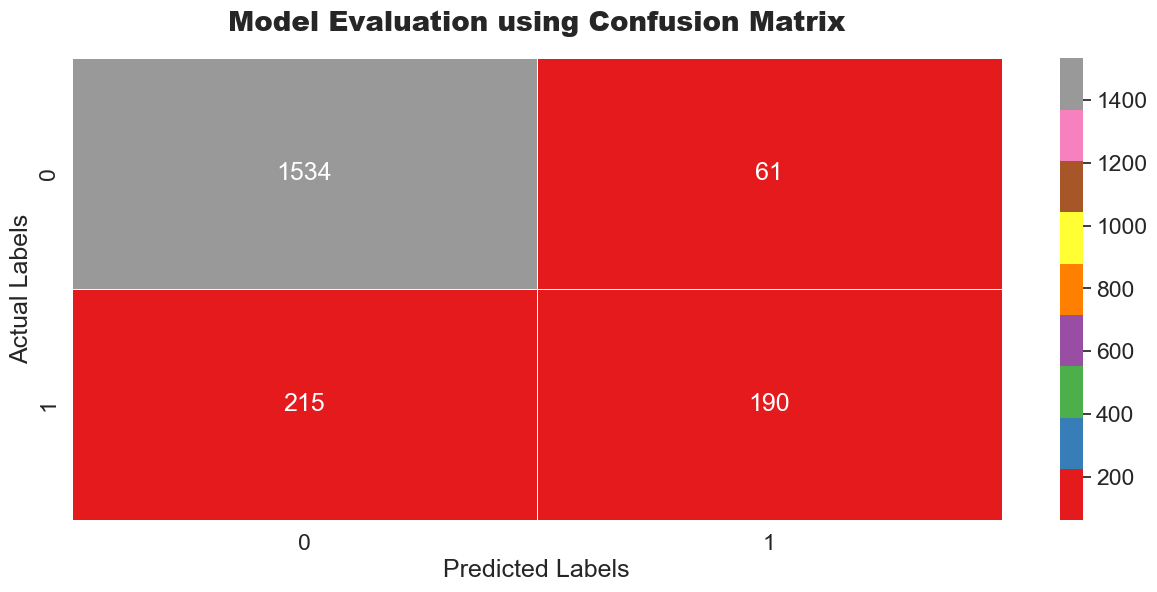

In [57]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

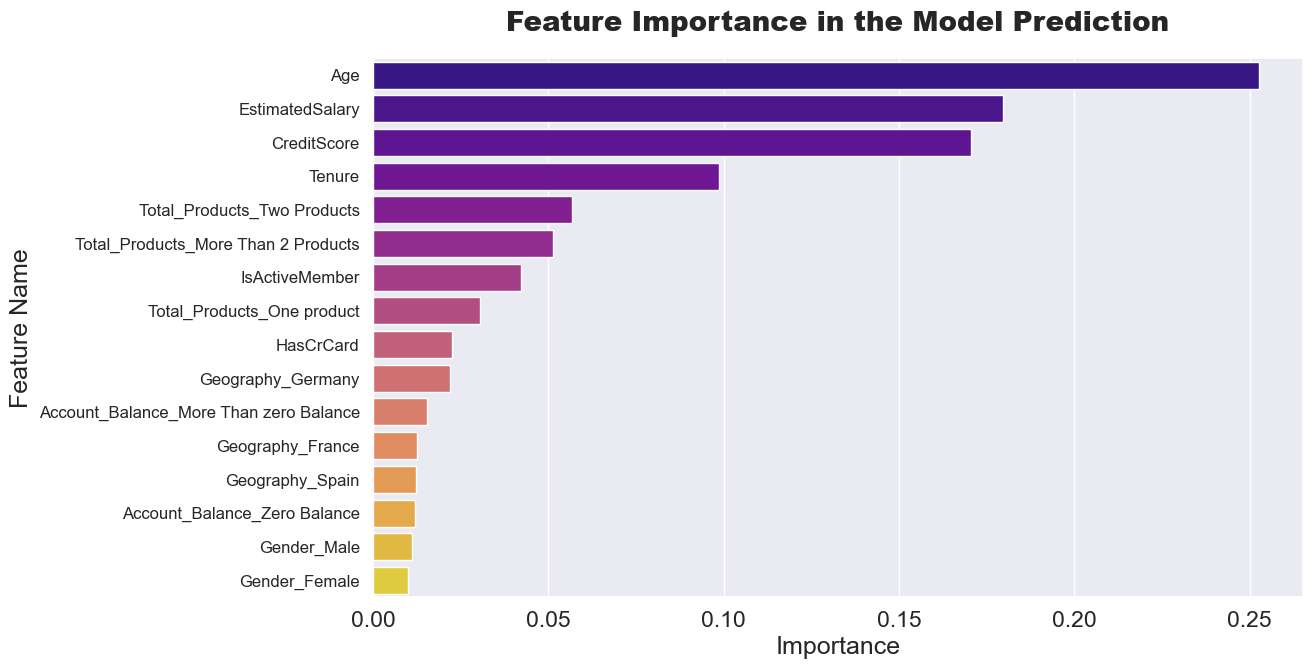

In [58]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

rfc.fit(x_train, y_train)

imp_df = pd.DataFrame({"Feature Name": x_train.columns, "Importance": rfc.feature_importances_})

features = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()



# Model Creation using 
# AdaBoostClassifier


In [59]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 40, 50],
    'learning_rate': [0.01,0.5],
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy : {accuracy*100:.2f}%")


Best Parameters: {'learning_rate': 0.5, 'n_estimators': 40}
Accuracy : 86.35%


In [60]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.72
Recall: 0.54
F1 Score: 0.61


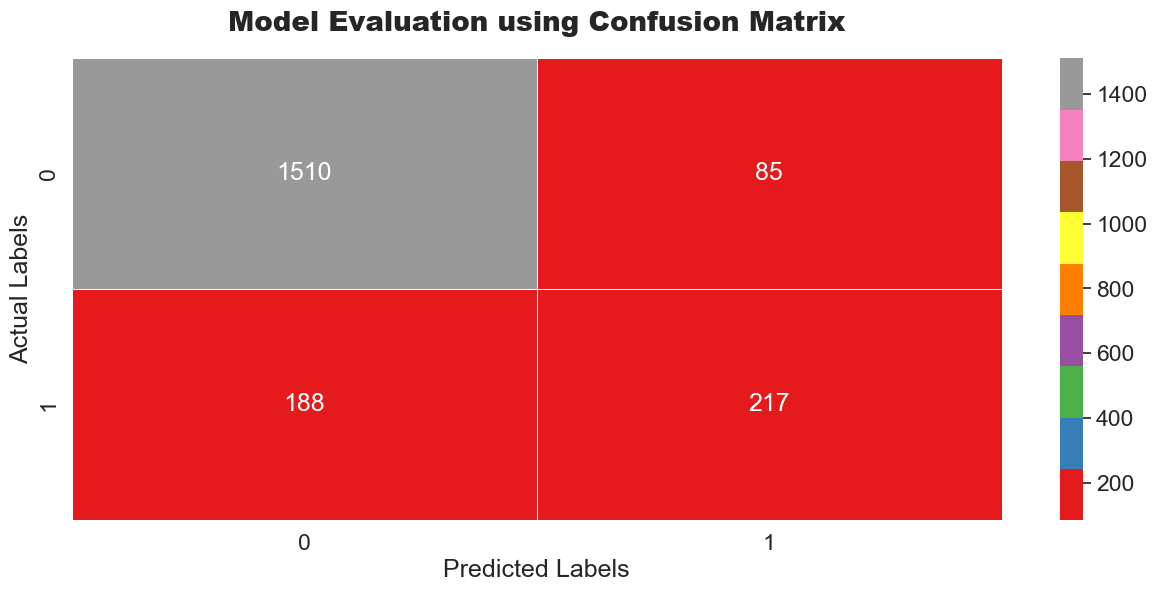

In [61]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

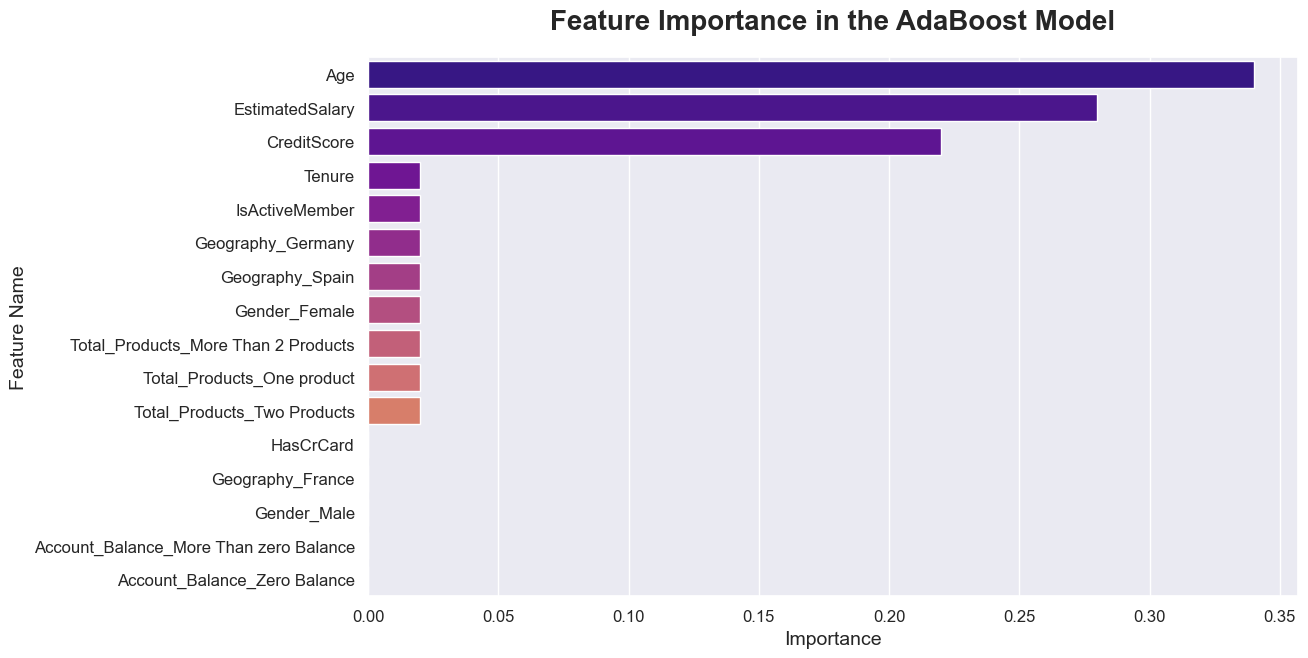

In [62]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost.fit(x_train, y_train)

imp_df = pd.DataFrame({"Feature Name": x_train.columns, "Importance": adaboost.feature_importances_})

features = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the AdaBoost Model", fontweight="bold", size=20, pad=20)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [63]:
# Conclusion

# The key factors that significantly influence the deactivation of customers banking facilities are 
# Total_Products,Age, IsActiveMember , Estimated Salary and Creditscore.
    
# The model's accuracy score near to 86%  appx. on the testing data in all the above three models 
    